# imports

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# read file

In [3]:
data = pd.read_csv("iris.csv")

# data exploration

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape

(150, 6)

In [9]:
data.ndim

2

In [10]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: >

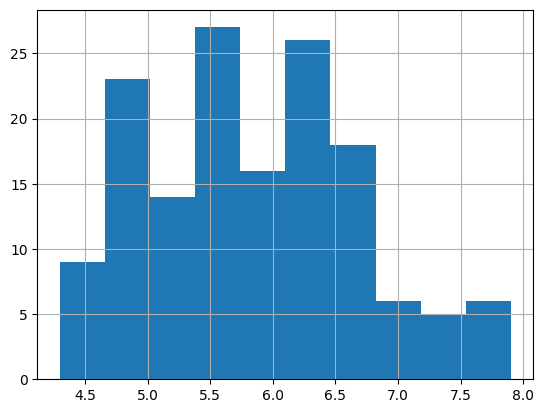

In [46]:
data['SepalLengthCm'].hist()


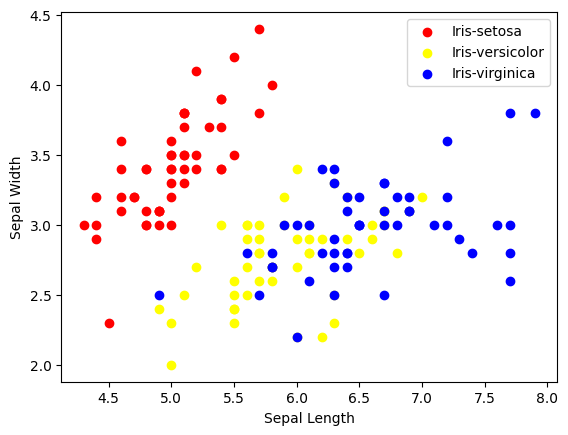

In [48]:
colors = ['red', 'yellow', 'blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

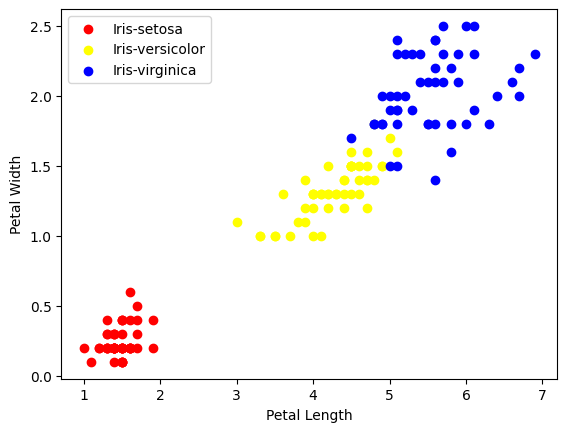

In [49]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

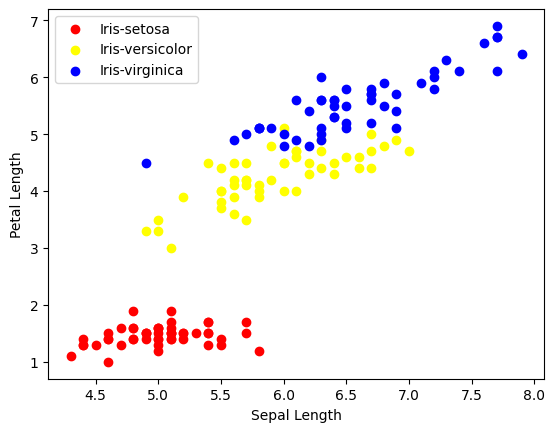

In [50]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

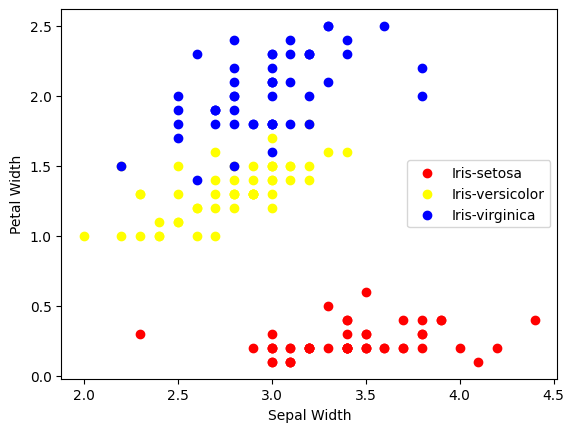

In [51]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# data cleaning

In [52]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# train and test spliting

In [19]:
data = data.drop(columns=['Id'])

In [25]:
X = data.drop(columns = ['Species']).to_numpy()
Y = data['Species'].to_numpy()

In [27]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [28]:
Y[0:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

# creating and training model

In [36]:
model1 = SVC()
model1.fit(X_train, y_train)

SVC()

In [37]:
model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [38]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

KNeighborsClassifier()

# predicting and calculating accuracy

In [39]:
predictions1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, predictions1)

In [40]:
predictions2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, predictions2)

In [41]:
predictions3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, predictions3)

# results

In [45]:
print("Support vector machine algorithm accuracy : ", "%.2f" %  (accuracy1*100), "%")
print("Naive Bayes algorithm accuracy            : ", "%.2f" %  (accuracy2*100), "%")
print("KNN algorithm accuracy                    : ", "%.2f" %  (accuracy3*100), "%")

Support vector machine algorithm accuracy :  100.00 %
Naive Bayes algorithm accuracy            :  93.33 %
KNN algorithm accuracy                    :  95.56 %
